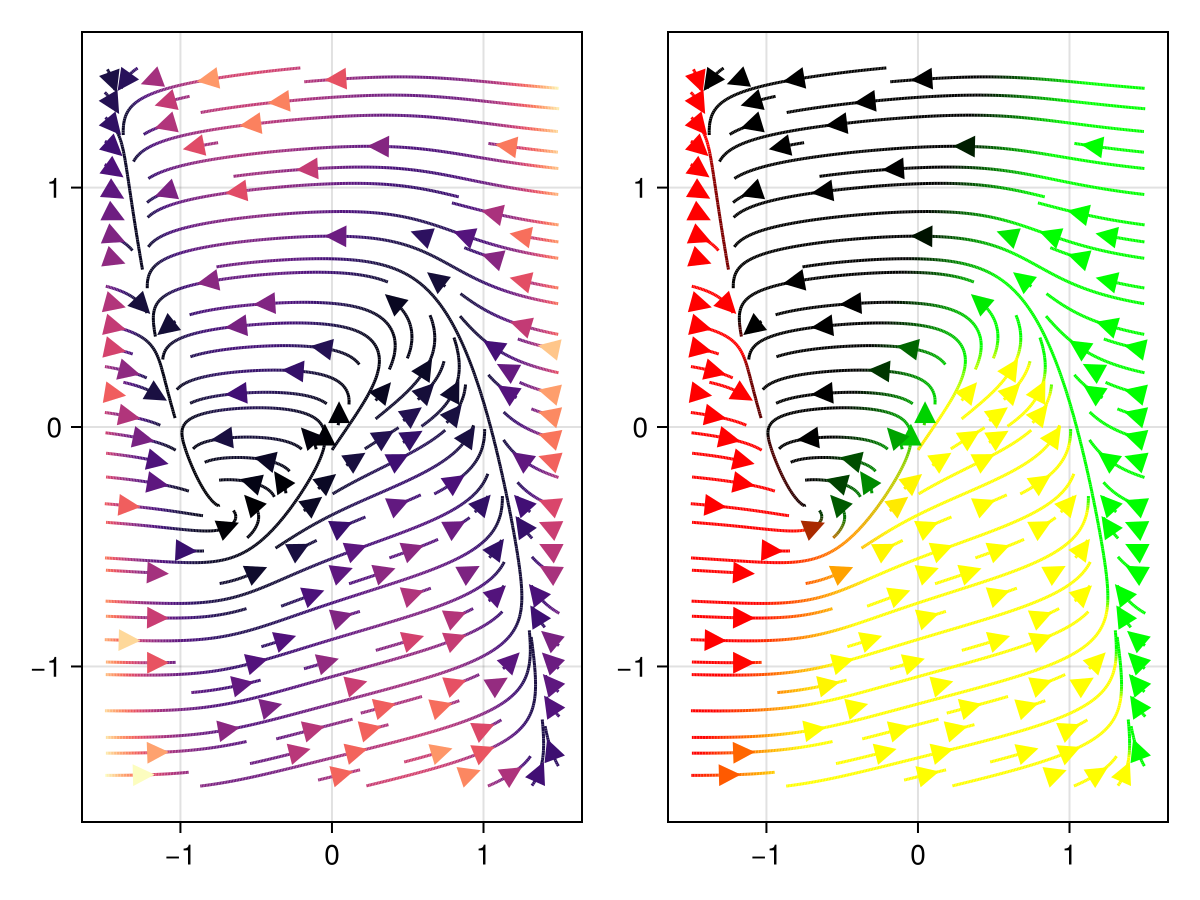

In [1]:
import CairoMakie as cm
import CairoMakie.:(..)

@kwdef struct FitzhughNagumo{T}
    ϵ::T = 0.1
    s::T = 0.0
    γ::T = 1.5
    β::T = 0.8
end

param = FitzhughNagumo()

function f(point, param::FitzhughNagumo)
    x, y = point
    (; ϵ, s, γ, β) = param
    cm.Point2f((x - y - x^3 + s)/ϵ, γ*x - y + β)
end

fig, ax, pl = 
cm.streamplot(point->f(point, param), -1.5..1.5, -1.5..1.5;
    colormap = :magma)
cm.streamplot(fig[1,2], point->f(point, param), -1.5..1.5, -1.5..1.5;
    color=p->cm.RGBAf(p..., 0.0, 1.0))
fig

In [2]:
?cm.streamplot

```julia
streamplot(f::function, xinterval, yinterval[, zinterval]; color = norm, kwargs...)
streamplot(f::function, rect; color = norm, kwargs...)
```

Plots streamlines of the function `f` in the given bounding box. A streamline is defined by matching its tangent vector with `f(p)` at any point `p`.

`f` must either accept `f(::Point)` or `f(x::Number, y::Number[, z::Number])` and must return a subtype of `VecTypes{2}` or `VecTypes{3}`, for example a `Vec2f` or `Point3d`.

Example:

```julia
v(x::Point2{T}) where T = Point2f(x[2], 4*x[1])
streamplot(v, -2..2, -2..2)
```

## Implementation

See the function `Makie.streamplot_impl` for implementation details.

## Plot type

The plot type alias for the `streamplot` function is `StreamPlot`.

## Attributes

**`alpha`** =  `1.0`  — The alpha value of the colormap or color attribute. Multiple alphas like in `plot(alpha=0.2, color=(:red, 0.5)`, will get multiplied.

**`arrow_head`** =  `automatic`  — Sets the marker for arrows which show the direction of the streamline. The default marker is either a (scatter) triangle or cone mesh, depending on dimensionality.

**`arrow_size`** =  `automatic`  — Sets the size of arrow markers. The default is scaled to the bounding box and gridsize of the plot

**`clip_planes`** =  `@inherit clip_planes automatic`  — Clip planes offer a way to do clipping in 3D space. You can set a Vector of up to 8 `Plane3f` planes here, behind which plots will be clipped (i.e. become invisible). By default clip planes are inherited from the parent plot or scene. You can remove parent `clip_planes` by passing `Plane3f[]`.

**`color`** =  `norm`  — One can choose the color of the lines by passing a function `color_func(dx::Point)` to the `color` attribute. This can be set to any function or composition of functions. The `dx` which is passed to `color_func` is the output of `f` at the point being colored.

**`colormap`** =  `@inherit colormap :viridis`  — Sets the colormap that is sampled for numeric `color`s. `PlotUtils.cgrad(...)`, `Makie.Reverse(any_colormap)` can be used as well, or any symbol from ColorBrewer or PlotUtils. To see all available color gradients, you can call `Makie.available_gradients()`.

**`colorrange`** =  `automatic`  — The values representing the start and end points of `colormap`.

**`colorscale`** =  `identity`  — The color transform function. Can be any function, but only works well together with `Colorbar` for `identity`, `log`, `log2`, `log10`, `sqrt`, `logit`, `Makie.pseudolog10`, `Makie.Symlog10`, `Makie.AsinhScale`, `Makie.SinhScale`, `Makie.LogScale`, `Makie.LuptonAsinhScale`, and `Makie.PowerScale`.

**`density`** =  `1.0`  — Sets the number of cells which need to be visited by streamlines. This must be between 0 and 1.

**`depth_shift`** =  `0.0`  — Adjusts the depth value of a plot after all other transformations, i.e. in clip space, where `-1 <= depth <= 1`. This only applies to GLMakie and WGLMakie and can be used to adjust render order (like a tunable overdraw).

**`fxaa`** =  `true`  — Adjusts whether the plot is rendered with fxaa (fast approximate anti-aliasing, GLMakie only). Note that some plots implement a better native anti-aliasing solution (scatter, text, lines). For them `fxaa = true` generally lowers quality. Plots that show smoothly interpolated data (e.g. image, surface) may also degrade in quality as `fxaa = true` can cause blurring.

**`gridsize`** =  `(32, 32, 32)`  — Controls the discretization of the bounding box. With `density = 1` each square/cube will be visited by at least one streamline.

**`highclip`** =  `automatic`  — The color for any value above the colorrange.

**`inspectable`** =  `@inherit inspectable`  — Sets whether this plot should be seen by `DataInspector`. The default depends on the theme of the parent scene.

**`inspector_clear`** =  `automatic`  — Sets a callback function `(inspector, plot) -> ...` for cleaning up custom indicators in DataInspector.

**`inspector_hover`** =  `automatic`  — Sets a callback function `(inspector, plot, index) -> ...` which replaces the default `show_data` methods.

**`inspector_label`** =  `automatic`  — Sets a callback function `(plot, index, position) -> string` which replaces the default label generated by DataInspector.

**`joinstyle`** =  `@inherit joinstyle`  — Controls the rendering at line corners. Options are `:miter` for sharp corners, `:bevel` for cut-off corners, and `:round` for rounded corners. If the corner angle is below `miter_limit`, `:miter` is equivalent to `:bevel` to avoid long spikes.

**`linecap`** =  `@inherit linecap`  — Sets the type of line cap used for streamlines. Options are `:butt` (flat without extrusion), `:square` (flat with half a linewidth extrusion) or `:round`.

**`linestyle`** =  `nothing`  — Sets the dash pattern for lines. See `?lines`.

**`linewidth`** =  `@inherit linewidth`  — Sets the linewidth of streamlines.

**`lowclip`** =  `automatic`  — The color for any value below the colorrange.

**`maxsteps`** =  `500`  — Controls the maximum number of points per streamline.

**`miter_limit`** =  `@inherit miter_limit`  — " Sets the minimum inner line join angle below which miter joins truncate. See also `Makie.miter_distance_to_angle`.

**`model`** =  `automatic`  — Sets a model matrix for the plot. This overrides adjustments made with `translate!`, `rotate!` and `scale!`.

**`nan_color`** =  `:transparent`  — The color for NaN values.

**`overdraw`** =  `false`  — Controls if the plot will draw over other plots. This specifically means ignoring depth checks in GL backends

**`quality`** =  `16`  — Sets the quality of the cone mesh generated for 3D arrow markers.

**`space`** =  `:data`  — Sets the transformation space for box encompassing the plot. See `Makie.spaces()` for possible inputs.

**`ssao`** =  `false`  — Adjusts whether the plot is rendered with ssao (screen space ambient occlusion). Note that this only makes sense in 3D plots and is only applicable with `fxaa = true`.

**`stepsize`** =  `0.01`  — Controls the discretization of streamlines. The smaller `stepsize`, the closer line points are together. The stepsize acts on the normalized output of `f` without taking limits into account.

**`transformation`** =  `:automatic`  — Controls the inheritance or directly sets the transformations of a plot. Transformations include the transform function and model matrix as generated by `translate!(...)`, `scale!(...)` and `rotate!(...)`. They can be set directly by passing a `Transformation()` object or inherited from the parent plot or scene. Inheritance options include:

  * `:automatic`: Inherit transformations if the parent and child `space` is compatible
  * `:inherit`: Inherit transformations
  * `:inherit_model`: Inherit only model transformations
  * `:inherit_transform_func`: Inherit only the transform function
  * `:nothing`: Inherit neither, fully disconnecting the child's transformations from the parent

Another option is to pass arguments to the `transform!()` function which then get applied to the plot. For example `transformation = (:xz, 1.0)` which rotates the `xy` plane to the `xz` plane and translates by `1.0`. For this inheritance defaults to `:automatic` but can also be set through e.g. `(:nothing, (:xz, 1.0))`.

**`transparency`** =  `false`  — Adjusts how the plot deals with transparency. In GLMakie `transparency = true` results in using Order Independent Transparency.

**`visible`** =  `true`  — Controls whether the plot gets rendered or not.


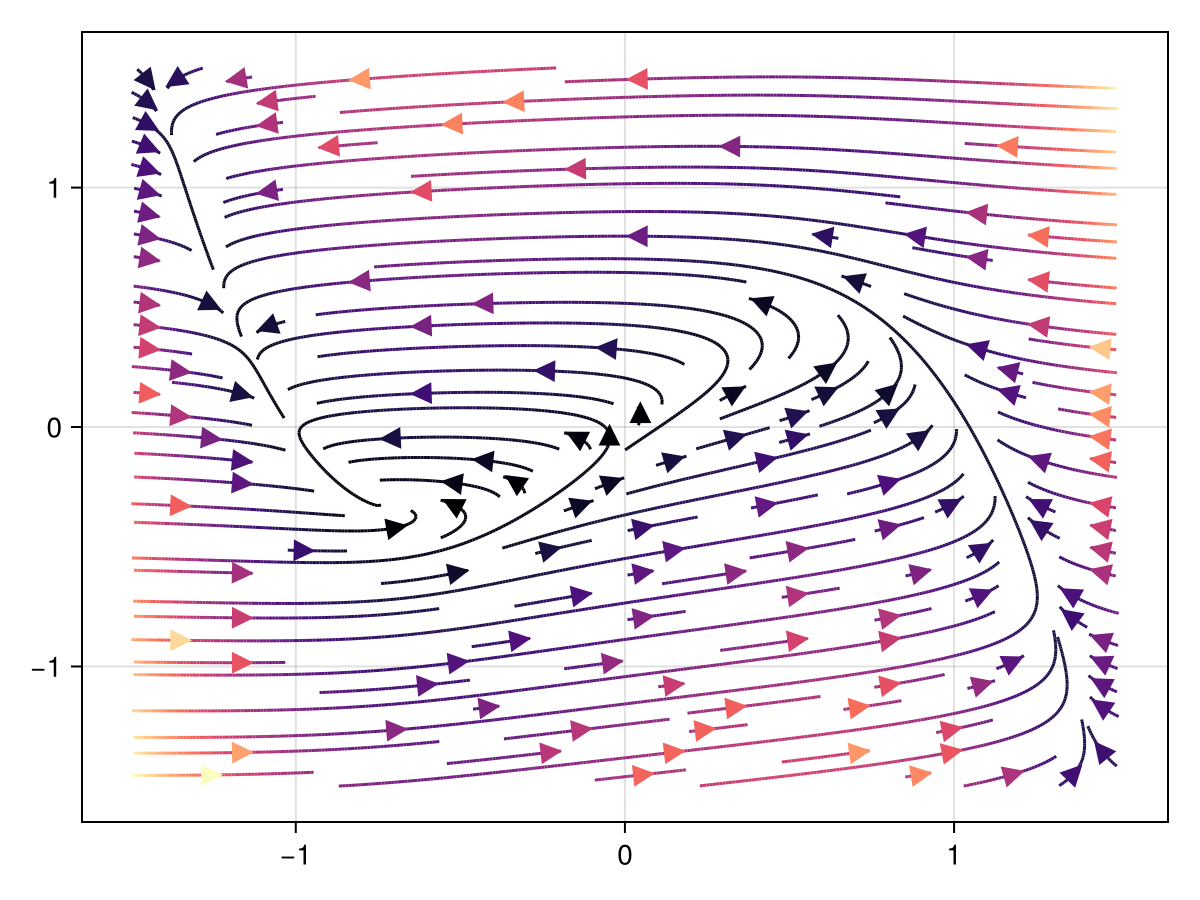

In [3]:
import CairoMakie as cm
import CairoMakie.:(..)

@kwdef struct FitzhughNagumo{T}
    ϵ::T = 0.1
    s::T = 0.0
    γ::T = 1.5
    β::T = 0.8
end

param = FitzhughNagumo()

function f(point, param::FitzhughNagumo)
    x, y = point
    (; ϵ, s, γ, β) = param
    cm.Point2f((x - y - x^3 + s)/ϵ, γ*x - y + β)
end

fig, ax, pl = 
cm.streamplot(point->f(point, param), -1.5..1.5, -1.5..1.5;
    colormap = :magma)
#cm.streamplot(fig[1,2], point->f(point, param), -1.5..1.5, -1.5..1.5;
#    color=p->cm.RGBAf(p..., 0.0, 1.0))
fig